<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd #импорт библиотеки pandas
import warnings #отключение варнингов
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv') #чтение файла с данными и сохранение в df
display(df.head(10)) #вывод на экран первых 10 строк таблицы df
df.info() #получение общей информации о таблице df

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

Исходные данные представлены в форме таблицы с одним столбцом, в названии которого — названия столбцов, разделенные символами "\t", внутри самого столбца — значения столбцов, также разделенные символами "\t". Тип данных в столбце — `object`. Следует разделить этот столбец на несколько и привести таблицу к соответствующему виду.


In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t') #повторное чтение файла с данными, сохранение в df с учетом разделителя "\t" 
display(df.head(10)) #повторный вывод на экран первых 10 строк таблицы df
df.info() #повторное получение общей информации о таблице df
df.describe() #получение информации о значениях столбцов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В таблице 22 столбца, 23699 строк. Согласно описанию данных:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

В названиях колонок нарушений стиля не выявлено.

Тип данных в столбцах 'total_images', 'rooms', 'floor' — `int`. Тип данных в столбцах 'last_price', 'total_area', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition' — `float`.
Тип данных в столбцах 'first_day_exposition', 'is_apartment', 'locality_name' — `object`. Тип данных в столбцах 'studio', 'open_plan' — `bool`. 

Количество значений во многих столбцах отличается от общего количества строк в таблице, следовательно, есть пропуски. В некоторых столбцах тип данных не соответсвтует сути самих данных (например, вещественный тип данных в столбце с числом балконов), в столбце 'is_apartment' тип данных — `object`, тогда как согласно описанию, должен быть — `bool`.

На этапе предобработки данных будут решены вышеозначенные проблемы с пропусками и исправлены типы данных в столбцах.

## Предобработка данных

In [4]:
print(df.isna().sum()) #количество пропусков
print(df.isna().mean()) #доля пропусков
df.duplicated().sum() #подсчет явных дубликатов

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64
total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.8829

0

Наибольшее число пропусков было обнаружено в столбцах: 'is_apartment' (20924), 'parks_nearest' (15620), 'ponds_nearest' (14589), 'balcony' (11519), 'ceiling_height' (9195). Также, пропуски есть в столбцах 'floors_total', 'living_area', 'kitchen_area', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000', 'days_exposition'. Дубликатов не обнаружено.

Для некоторых пропущенных значений можно предположить логичную замену. Например, пропуски в столбце 'balcony' (число балконов) могут свидетельствовать об отсутствии балконов. В таких случаях, пропуски допустимо заменить на 0. Подобная ситуация и с пропусками в столбце 'is_apartment' - 20924 пропусков, вероятно, означают, что указанные помещения не являются апартаментами. Эти пропуски можно заменить на False.

Кроме того, пропуски могут означать отсутствие парков и водоёмов в радиусе 3 км (столбцы 'parks_around3000', 'ponds_around3000'). Что примечательно, в этих двух столбцах число пропусков совпадает - 5518. Их также можно заменить на 0.

Однако, устранить пропуски в некоторых столбцах подобным образом не получится. Например, пропуск в столбце 'locality_name' заполнить проблематично, ведь если название населенного пункта не было указано сразу, угадать его не получится, а вписывать любое другое название - некорректно. 

В то же время, для многих других столбцов пропуски заполнить необходимо, поскольку они требуются для дальнейшего исследования. Если же удалить эти пропуски, то есть риск потерять ценные данные, что так же негативно повлияет на ход исследования. В частности, таким столбцом является 'ceiling_height' (9195 пропусков), который является важным параметром для дальнейшего исследования.

In [5]:
for name in ['balcony', 'parks_around3000', 'ponds_around3000']: #замена пропусков в столбцах 'balcony', 'parks_around3000', 'ponds_around3000'
    df[name] = df[name].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna(value=False) #замена пропусков в столбце 'is_apartment'
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median()) #замена пропусков в столбце 'floors_total'

Далее, необходимо заполнить пропуски и устранить аномальные значения в столбце 'ceiling_height'. 
Методом describe() было установлено, что в данном столбце помимо пропусков присутствуют нереалистично большие значения (например, 100 м), а также слишком малые значения (1 м). В них, скорее всего, допущена ошибка при записи, поэтому с ними также необходимо разобраться. Для начала, следует изучить все нереалистичные значения. Среднестатистическая высота потолка в квартире - примерно 2.5 - 3 м. Учитывая, что в списке может быть представлено элитное жилье с более высокими потолками, установим условное ограничение в 5 м. Выведем полученные значения на экран:


In [6]:
df.loc[(df['ceiling_height'] > 5) | (df['ceiling_height'] < 2.5), 'ceiling_height'].value_counts()#просмотр значений в столбце 'ceiling_height' более 5

2.40      23
2.45      15
2.00      11
2.48       8
27.00      8
25.00      7
2.30       4
2.47       3
8.00       3
2.46       2
5.30       2
32.00      2
5.60       1
5.20       1
8.30       1
10.30      1
26.00      1
6.00       1
100.00     1
2.25       1
14.00      1
24.00      1
1.20       1
27.50      1
5.80       1
2.49       1
2.34       1
20.00      1
22.60      1
5.50       1
1.75       1
2.20       1
1.00       1
Name: ceiling_height, dtype: int64

Исходя из полученных данных, было установлено, что в столбце 'ceiling_height' присутствует целый ряд нереалистично больших и малых значений. Полученные значения позволили скорректировать критерии отбора. Все значения, не попадающие в интервал от 2 до 6 следует заменить на медианные, поскольку их реалистичность сомнительна и в своем текущем виде они могут негативно повлиять дальнейший на ход исследования. 

Произведем замену и заполним пропуски:

In [7]:
df.loc[(df['ceiling_height'] < 2) | (df['ceiling_height'] > 6), 'ceiling_height'] = df['ceiling_height'].median() #замена аномальных значений
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) #заполнение пропусков медианным значением по столбцу   

Далее, изменим типы данных для тех столбцов, в которых они являются некорректными и могут затруднить дальнейшее исследование. К ним относятся: 'last_price' (float в int), 'is_apartment' (object в bool), 'first_day_exposition' (object в datetime), 'balcony' (float в int), 'days_exposition' (float в int), 'floors_total' (float в int).

In [8]:
for name in ['last_price', 'balcony', 'floors_total']: #замена типа данных на целочисленный 
    df[name] = df[name].astype('int')
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
) #перевод данных в формат даты 
df['is_apartment'] = df['is_apartment'].astype('bool') #замена типа данных на булев

In [9]:
df.info() #повторное получение информации о датафрейме для проверки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Вывод

На этапе предобработки были выявлены и, в необходимой для исследования мере, устранены следующие проблемы в данных: пропуски, аномальные значения, некорректность типов данных. Пропуски могли возникнуть из-за того, что пользователи по тем или иным причинам не указали в своих объявлениях определенную информацию. Причина возникновения аномальных значений, скорее всего, кроется в том, что были допущены ошибки при заполнении соответствующих граф со стороны пользователей сервиса. Проблема некорректности типов данных некоторых столбцов, вероятно, носит технический характер, поскольку не задается самими пользователями. Вполне возможно, что проблема возникла, например, в процессе считывания, копирования, смены формата или при записи данных, или же изначально записывалась в некорректном формате.

## Расчёты и добавление результатов в таблицу

На данном этапе исследования необходимо произвести расчеты следующих показателей: цена квадратного метра; день недели, месяц и год публикации объявления; этаж квартиры; соотношение жилой и общей площади; отношение площади кухни к общей. Результаты этих расчетов будут добавлены в таблицу в виде дополнительных столбцов.

In [10]:
df['sqMeter_price'] = df['last_price'] / df['total_area'] #цена кв метра
df['sqMeter_price'] = df['sqMeter_price'].astype(int)

df['week_day'] = df['first_day_exposition'].dt.weekday #день недели, месяц и год публикации объявления
df.loc[df['week_day'] == 0, 'week_day'] = 'пн'
df.loc[df['week_day'] == 1, 'week_day'] = 'вт'
df.loc[df['week_day'] == 2, 'week_day'] = 'ср'
df.loc[df['week_day'] == 3, 'week_day'] = 'чт'
df.loc[df['week_day'] == 4, 'week_day'] = 'пт'
df.loc[df['week_day'] == 5, 'week_day'] = 'сб'
df.loc[df['week_day'] == 6, 'week_day'] = 'вс'
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

df['floor_category'] = df['floor'] #этаж квартиры; варианты — первый, последний, другой
for index in range(len(df['floor_category'])):
    if df['floor_category'][index] == 1:
        df['floor_category'][index] = 'первый'
    elif df['floor_category'][index] == df['floors_total'][index]:
        df['floor_category'][index] = 'последний'
    else:
        df['floor_category'][index] = 'другой'

df['living_to_total'] = df['living_area'] / df['total_area'] #соотношение жилой и общей площади, а также отношение площади кухни к общей
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']


In [11]:
df.head() #вывод первых пяти строк на экран для проверки новых столбцов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqMeter_price,week_day,month,year,floor_category,living_to_total,kitchen_to_total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370,чт,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,81.0,82920,вт,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,92785,чт,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,3.0,234.0,424.0,408176,пт,7,2015,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000,вт,6,2018,другой,0.320000,0.410000


### Вывод

На данном этапе были расчитаны и добавлены в таблицу следующие показатели: цена квадратного метра; день недели, месяц и год публикации объявления; этаж квартиры; соотношение жилой и общей площади; отношение площади кухни к общей. Полученные показатели будут задействованы в ходе этапа исследовательского анализа данных.

## Исследовательский анализ данных

Далее, необходимо проанализировать данные и провести ряд исследований с целью оценки ряда показателей, проверки гипотез об их взаимосвязях и влиянии на рыночные цены квартир.

Для начала, построим гистограммы для следующих параметров квартир: площадь, цена, число комнат, высота потолков.

<AxesSubplot:>

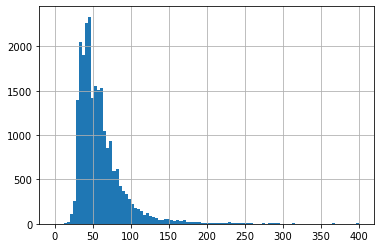

In [12]:
df['total_area'].hist(bins=100, range=(0, 400)) #построение гистограммы для параметра площади

Данная гистограмма наглядно демонстрирует, что подавляющее большинство квартир из объявлений имеют площадь значительно меньше 100 кв. м ("пик" наблюдается в районе 40 кв. м). Есть также и небольшое количество квартир с весьма малой или, наоборот, крайне большой площадью, однако их количество - минимально. 

Далее, построим гистограмму для цены квартир. Для удобства и наглядности графика, цены следует разделить на 1000000.

<AxesSubplot:>

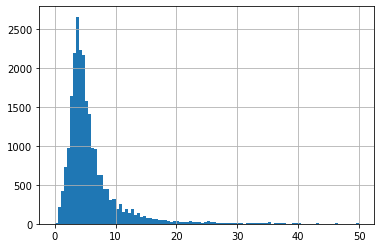

In [13]:
(df['last_price'] / 1000000).hist(bins=100, range=(0, 50)) #построение гистограммы для параметра цены

Согласно гистограмме, цена большинства квартир составляет менее 10 млн. руб. Пик приходится на 4-5 млн. руб. Тем не менее, также наблюдается некоторое количество квартир со стоимостью более 10 млн. руб. Их количество постепенно снижается по мере увеличения цены в промежутке с 10 до 20 млн. руб. В промежутке с 20 до 30 млн. руб. их количество остается примерно одинаковым. Начиная с 40 млн. руб., количество таких квартир становится практически равным нулю.

<AxesSubplot:>

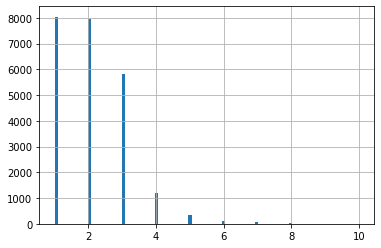

In [14]:
df['rooms'].hist(bins=100, range=(1, 10)) #построение гистограммы для параметра числа комнат

Было установлено, что большинство квартир имеют 1-2 комнаты, причем количество таких квартир примерно одинаково. Следом за ними - квартиры с 3 комнатами. Квартир с 4 комнатами и более - суммарно около 2000.

<AxesSubplot:>

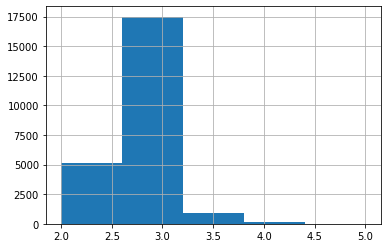

In [15]:
df['ceiling_height'].hist(bins=5, range=(2, 5)) #построение гистограммы для параметра высоты потолков

Согласно гистограмме, большинство квартир имеют высоту потолков в пределах 2,6 - 3,2 м.

Теперь, следует изучить время продажи квартиры. Для этого, необходимо построить еще одну гистограмму, определить среднее и медиану.

<AxesSubplot:>

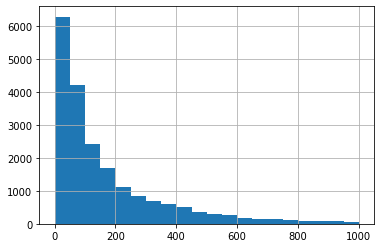

In [16]:
df['days_exposition'].hist(bins=20, range=(0, 1000)) #построение гистограммы для параметра времени продажи квартиры

In [17]:
df['days_exposition'].median() #определяем медиану

95.0

In [18]:
df['days_exposition'].mean() #определяем среднее

180.88863436982163

Среднее время продажи - 169 дней, медианное значение - 95 дней. Согласно гистограмме, "быстрой" можно назвать продажу квартиры до 100 дней, "необычно долгой" - свыше 200 дней.

Перед тем, как продолжить исследовательский анализ данных и приступить к изучению взаимосвязей различных параметров квартир и их цен, требуется избавиться хотя бы от части обнаруженных ранее редких и выбивающихся значений.

In [19]:
df = df.drop(df[df['last_price'] > 30000000].index) #отсеиваем слишком дорогие квартиры
df = df.drop(df[df['total_area'] > 200].index) #отсеиваем слишком большие квартиры
df = df.drop(df[(df['total_area'] < 50) & (df['last_price'] > 10000000)].index) #отсеиваем слишком маленькие и одновременно нереалистично дорогие
df = df.drop(df[(df['total_area'] > 100) & (df['last_price'] < 5000000)].index) #отсеиваем слишком большие и одновременно нереалистично дешевые
df = df.drop(df[df['rooms'] > 4].index) #отсеиваем квартиры со слишком большим числом комнат
df = df.drop(df[df['rooms'] < 1].index) #отсеиваем квартиры, не имеющие комнат
df = df.drop(df[df['cityCenters_nearest'] > 25000].index) #отсеиваем квартиры, которые слишком далеко от центра города
df.info() #повторный вывод информации о датафрейме на экран после удаления редких и выбивающихся значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20832 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20832 non-null  int64         
 1   last_price            20832 non-null  int64         
 2   total_area            20832 non-null  float64       
 3   first_day_exposition  20832 non-null  datetime64[ns]
 4   rooms                 20832 non-null  int64         
 5   ceiling_height        20832 non-null  float64       
 6   floors_total          20832 non-null  int64         
 7   living_area           19126 non-null  float64       
 8   floor                 20832 non-null  int64         
 9   is_apartment          20832 non-null  bool          
 10  studio                20832 non-null  bool          
 11  open_plan             20832 non-null  bool          
 12  kitchen_area          18996 non-null  float64       
 13  balcony         

Таким образом, были удалены 2867 строк (из 23699, т.е. около 12%), аномальные данные в которых препятствовали проведению дальнейшего анализа. Примечательно, что указанные значения цены и площади могли быть введены пользователями с ошибкой в виде лишнего 0, поскольку если сократить их на 10, то они становятся вполне адекватными и реалистичными. Тем не менее, раз однозначного подтверждения этому нет, было принято решение отбросить наиболее сомнительные значения. Теоретически, можно было бы подобрать более строгие критерии отбора значений, но для этого недостаточно оснований. Оставшиеся значения, в целом, можно охарактеризовать как реалистичные и признать их пригодными для анализа.

Теперь можно приступать непосредственно к анализу влияния различных факторов на стоимость квартиры. Для этого можно построить графики, показывающие зависимость цены от ряда параметров: площади, числа комнат, удалённости от центра, этажа, даты размещения объявления.

<AxesSubplot:xlabel='total_area'>

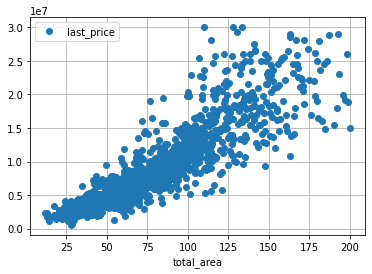

In [20]:
(
    df
    .pivot_table(index='total_area', values='last_price')
    .plot(style='o', grid=True) #график зависимости цены от площади
)

Согласно данному графику, цена квартиры находится в прямой зависимости от ее площади.

<AxesSubplot:xlabel='rooms'>

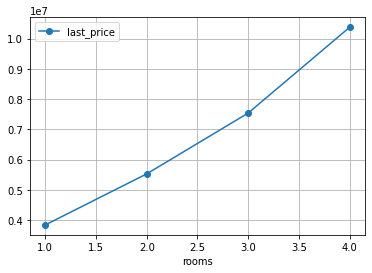

In [21]:
(
    df
    .pivot_table(index='rooms', values='last_price')
    .plot(style='o-', grid=True) #график зависимости цены от числа комнат
)

Данный график также позволяет судить о том, что цена квартиры имеет прямую зависимость от числа комнат.

<AxesSubplot:xlabel='cityCenters_nearest'>

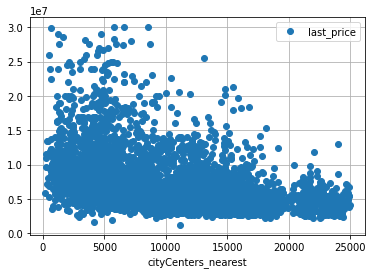

In [22]:
(
    df
    .pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(style='o', grid=True) #график зависимости цены от удалённости от центра
)

Согласно данному графику, большинство квартир находятся в пределах 15 км от центра города. Стоимость квартир имеет обратную зависимость от расстояния до центра.

<AxesSubplot:xlabel='floor_category'>

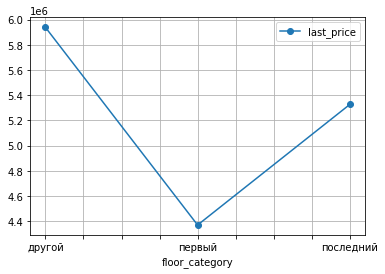

In [23]:
(
    df
    .pivot_table(index='floor_category', values='last_price')
    .plot(style='o-', grid=True) #график зависимости цены от этажа
)

Данный график показывает, что стоимость квартир, расположенных на первом этаже существенно ниже стоимости квартир, расположенных на последнем этаже. Наибольшую стоимость имеют квартиры, не располагающиеся на первом или последнем этажах.

<AxesSubplot:xlabel='week_day'>

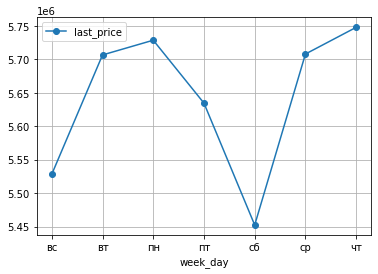

In [24]:
(
    df
    .pivot_table(index='week_day', values='last_price')
    .plot(style='o-', grid=True) #график зависимости цены от дня недели размещения объявления
)

Согласно данному графику, большую цену имеют квартиры, объявления о продаже которых были размещены в четверг, понедельник, среду, вторник. Меньшую - в субботу, воскресенье и пятницу.

<AxesSubplot:xlabel='month'>

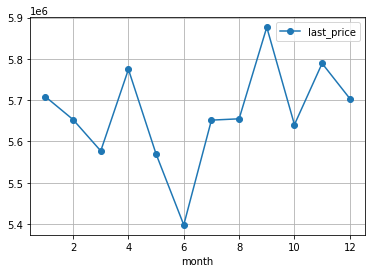

In [25]:
(
    df
    .pivot_table(index='month', values='last_price')
    .plot(style='o-', grid=True) #график зависимости цены от дня месяца размещения объявления
)

Данный график показывает, что цены квартир зависят от месяца размещения объявления следующим образом: наибольшие цены - при размещении в сентябре, ноябре и апреле, наименьшие - при размещении в июне.

<AxesSubplot:xlabel='year'>

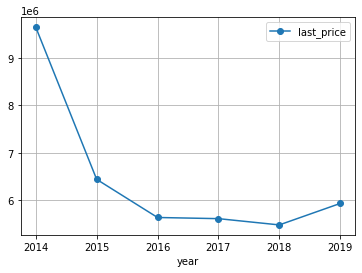

In [26]:
(
    df
    .pivot_table(index='year', values='last_price')
    .plot(style='o-', grid=True) #график зависимости цены от года размещения объявления
)

Согласно графику, цены квартир неуклонно снижались после 2014 года, вплоть до 2018 года. В период с 2018 года по 2019 наблюдается заметный рост цен.

Далее, добавим расчёт корреляции для площади, количества комнат и расстояния от центра.

In [27]:
print(df['last_price'].corr(df['total_area'])) #расчёт корреляции цены и площади
print(df['last_price'].corr(df['rooms'])) #расчёт корреляции цены и числа комнат
print(df['last_price'].corr(df['cityCenters_nearest'])) #расчёт корреляции цены и расстояния от центра

0.7859498369336809
0.4591075827328978
-0.4051574601005894


Поскольку коэффициент корреляции Пирсона в первых двух случаях — положительный, то цена квартир растет с увеличением площади и числа комнат, и наоборот, снижается при увеличении расстояния от центра, поскольку в третьем случае коэффициент отрицательный. Линейная взаимосвязь наиболее тесная в первом случае, поскольку коэффициент ближе к крайнему значению 1. В остальных двух случаях она значительно слабее, поскольку оба значения ближе к 0.

In [28]:
df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.785950,0.459108,-0.405157
total_area,0.785950,1.000000,0.765647,-0.298509
rooms,0.459108,0.765647,1.000000,-0.222698
cityCenters_nearest,-0.405157,-0.298509,-0.222698,1.000000


Теперь, определим 10 населённых пунктов с наибольшим числом объявлений.

In [29]:
df['locality_name'].value_counts().head(10) #выбираем 10 населённых пунктов с наибольшим числом объявлений

Санкт-Петербург            14817
посёлок Мурино               493
Всеволожск                   391
посёлок Парголово            322
Гатчина                      305
деревня Кудрово              283
посёлок Шушары               251
Выборг                       233
Кудрово                      168
деревня Новое Девяткино      141
Name: locality_name, dtype: int64

Согласно полученным данным, наибольшее число объявлений - из Санкт-Петербурга (14817). 

Теперь, следует изучить стоимость жилья в этих населённых пунктах. Для этого необходимо посчитать среднюю цену квадратного метра, а затем выделить населённые пункты с самой высокой и низкой стоимостью жилья.

In [30]:
df_names = ["Санкт-Петербург", "посёлок Мурино", "посёлок Шушары", "Всеволожск", "Пушкин", "Колпино", "посёлок Парголово", "Гатчина", "деревня Кудрово", "Выборг"] #создаем список из 10 населённых пунктов
display(df.query('locality_name in @df_names').pivot_table(index='locality_name', values='sqMeter_price', aggfunc='mean')) #подсчёт средней цены квадратного метра
display(df.query('locality_name in @df_names').pivot_table(index='locality_name', values='last_price', aggfunc='mean')) #определяем стоимость жилья

,sqMeter_price
locality_name,
Всеволожск,67155.132992
Выборг,58513.201717
Гатчина,68988.363934
Колпино,82865.000000
Пушкин,99929.666667
Санкт-Петербург,110649.856854
деревня Кудрово,92296.749117
посёлок Мурино,85120.018256
посёлок Парголово,90448.000000


,last_price
locality_name,
Всеволожск,3.766207e+06
Выборг,3.226545e+06
Гатчина,3.480788e+06
Колпино,2.950000e+06
Пушкин,5.499619e+06
Санкт-Петербург,6.692448e+06
деревня Кудрово,4.334467e+06
посёлок Мурино,3.734949e+06
посёлок Парголово,4.503557e+06


Согласно полученным данным, среди выбранных населённых пунктов наибольшая средняя цена квадратного метра - в Санкт-Петербурге (110650 руб.), наименьшая - в Выборге (58513 руб.). Самая высокая средняя стоимость жилья - также в Санкт-Петербурге (6.69 млн. руб.), самая низкая - в Колпино (2.95 млн. руб.).



Далее, перейдем к анализу данных о квартирах в Санкт-Петербурге. Определим, какая область входит в центр города. Для этого необходимо создать столбец с расстоянием до центра в километрах, а затем посчитать среднюю цену для каждого километра. Также, для наглядности следует построить график, показывающий, как цена зависит от удалённости от центра. 

<AxesSubplot:xlabel='cityCenters_km'>

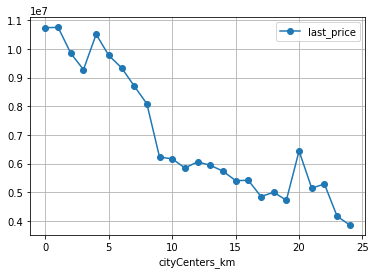

In [31]:
df['cityCenters_km'] = df['cityCenters_nearest'] / 1000 #создаем столбец, заполняем значениями из 'cityCenters_nearest', переведенными в км
df['cityCenters_km'] = df['cityCenters_km'].fillna(df['cityCenters_km'].median()).astype('int') #заполняем пропуски медианным значением, округляем до целого
df.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean').plot(style='o-', grid=True) #подсчёт средней цены для каждого километра, построение графика

Цена существенно падает после отметки в 8 км, а значит "центром города" можно назвать территорию в радиусе 8 км. Проанализируем квартиры в этой области и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [32]:
df_spb = df.query('locality_name == "Санкт-Петербург" & cityCenters_km <= 8') 

<AxesSubplot:>

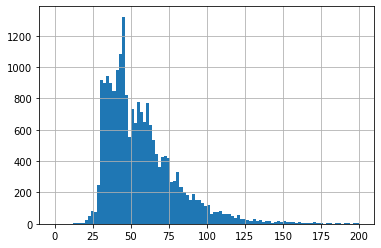

In [33]:
df['total_area'].hist(bins=100, range=(0, 200)) #построение гистограммы для параметра площади (вся база)

<AxesSubplot:>

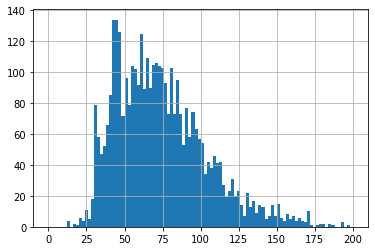

In [34]:
df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['cityCenters_km'] <= 8), 'total_area'].hist(bins=100, range=(0, 200)) #построение гистограммы для параметра площади (Санкт-Петербург, центр)

Согласно гистограмме, подавляющее большинство квартир в центре Санкт-Петербурга имеют площадь до 100 кв. м. В целом, распределение по параметру площади несколько отличается от общей базы - пик все так же в районе 45 кв. м, однако заметно, что доля больших квартир (начиная с 50 кв. м и далее) существенно выше.

<AxesSubplot:>

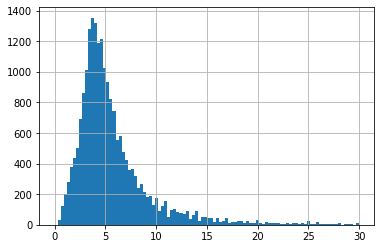

In [35]:
(df['last_price'] / 1000000).hist(bins=100, range=(0, 30)) #построение гистограммы для параметра цены (вся база)

<AxesSubplot:>

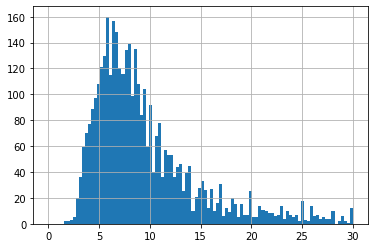

In [36]:
(df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['cityCenters_km'] <= 8), 'last_price'] / 1000000).hist(bins=100, range=(0, 30)) #построение гистограммы для параметра цены (Санкт-Петербург, центр)

Представленные данные говорят о том, что в центре Санкт-Петербурга доля дорогих квартир выше, чем по всей базе данных. Такой вывод можно сделать исходя из того, что "пик" и "уклон" на второй гистограмме расположены правее отметки в 5 млн. руб., в отличие от первой. К тому же, спад более плавный, а так же наблюдаются многочисленные резкие выбросы после 5 млн. руб., гораздо более существенные, чем на первой гистограмме, что тоже свидетельствует о большей доле дорогих квартир.

<AxesSubplot:>

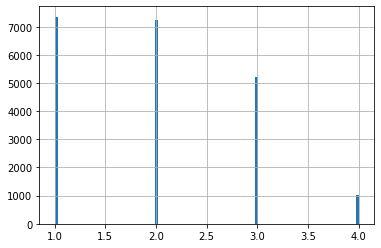

In [37]:
df['rooms'].hist(bins=100, range=(1, 4)) #построение гистограммы для параметра числа комнат (вся база)

<AxesSubplot:>

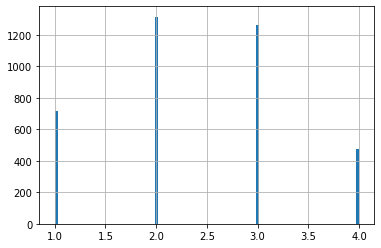

In [38]:
df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['cityCenters_km'] <= 8), 'rooms'].hist(bins=100, range=(1, 4)) #построение гистограммы для параметра числа комнат (Санкт-Петербург, центр)

Данные гистограмм говорят о том, что в центре Санкт-Петербурга доля двухкомнатных и трехкомнатных квартир существенно выше, чем по всей базе. Примечательно, что в отличие от первой гистограммы, на второй доли двухкомнатных и трехкомнатных квартир практически равны, а доля однокомнатных квартир существенно ниже. То есть, можно сделать вывод о том, что в центре Санкт-Петербурга преобладают двухкомнатные и трехкомнатные квартиры, в отличие от данных по базе в целом, где преобладают однокомнатные и двухкомнатные квартиры.

<AxesSubplot:>

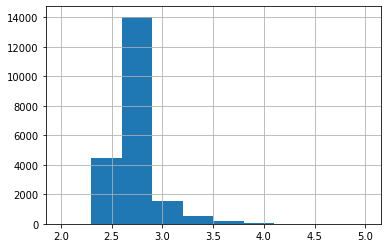

In [39]:
df['ceiling_height'].hist(bins=10, range=(2, 5)) #построение гистограммы для параметра высоты потолков (вся база)

<AxesSubplot:>

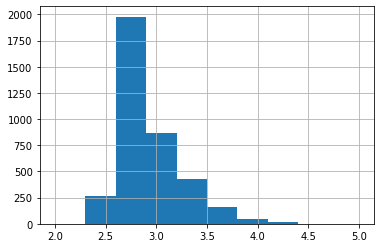

In [40]:
df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['cityCenters_km'] <= 8), 'ceiling_height'].hist(bins=10, range=(2, 5)) #построение гистограммы для параметра высоты потолков (Санкт-Петербург, центр)

Полученные данные говорят о том, что в центре Санкт-Петербурга доля квартир с высокими потолками выше, чем по всей базе данных. "Пики" расположены одинаково, зато на второй гистограмме доля квартир с высотой потолков до 2.5 м меньше, чем на первой, а вот доля квартир с высотой потолков более 3 м заметно больше.

Далее следует проанализировать ряд факторов, влияющих на стоимость квартиры: число комнат, этаж, удалённость от центра, дата размещения объявления.

<AxesSubplot:title={'center':'Санкт-Петербург, центр'}, xlabel='rooms'>

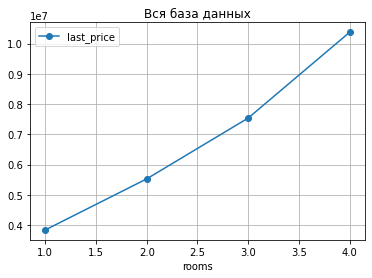

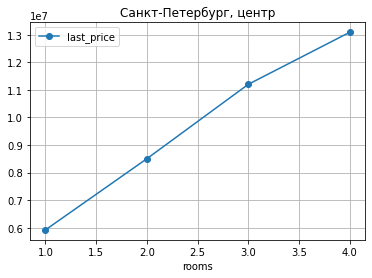

In [41]:
(
    df
    .pivot_table(index='rooms', values='last_price')
    .plot(title='Вся база данных', style='o-', grid=True) #график зависимости цены от числа комнат (вся база)
)
(
    df.query('locality_name == "Санкт-Петербург" & cityCenters_km <= 8')
    .pivot_table(index='rooms', values='last_price')
    .plot(title='Санкт-Петербург, центр', style='o-', grid=True) #график зависимости цены от числа комнат (Санкт-Петербург, центр)
)

Согласно представленным графикам, можно сделать вывод о том, что у квартир в центре Санкт-Петербурга стоимость сильнее возрастает с ростом числа комнат (вплоть до 3), чем у квартир по всей базе данных. То есть, разница в стоимости между двухкомнатной и однокомнатной (или трехкомнатной и двухкомнатной) квартирами на данной территории в среднем больше, чем по всей базе. Однако, разница между четырехкомнатной и трехкомнатной, наоборот, меньше, чем по всей базе.

<AxesSubplot:title={'center':'Санкт-Петербург, центр'}, xlabel='floor_category'>

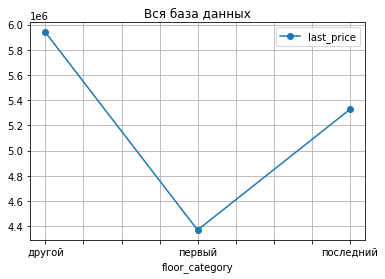

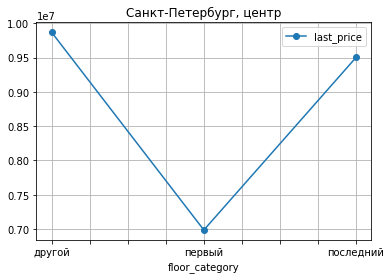

In [42]:
(
    df
    .pivot_table(index='floor_category', values='last_price')
    .plot(title='Вся база данных', style='o-', grid=True) #график зависимости цены от этажа (вся база)
)
(
    df.query('locality_name == "Санкт-Петербург" & cityCenters_km <= 8')
    .pivot_table(index='floor_category', values='last_price')
    .plot(title='Санкт-Петербург, центр', style='o-', grid=True) #график зависимости цены от этажа (Санкт-Петербург, центр)
)

В целом, благодаря данным графикам можно утверждать, что квартиры на первом этаже в обоих случаях имеют значительно более низкую стоимость, чем квартиры на других этажах. Квартиры на последем этаже также в обоих случаях дешевле квартир на других этажах, однако во втором случае эта разница существенно ниже. Следовательно, для центра Санкт-Петербурга последний этаж является менее существенным фактором снижения стоимости квартиры, чем для квартир по базе данных в целом.

<AxesSubplot:title={'center':'Санкт-Петербург, центр'}, xlabel='cityCenters_nearest'>

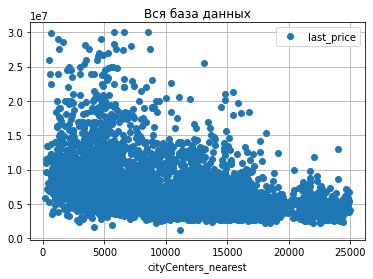

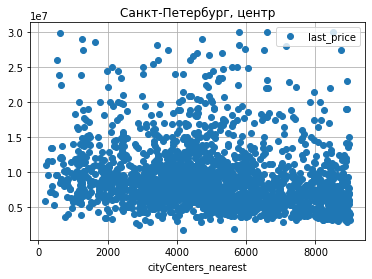

In [43]:
(
    df
    .pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(title='Вся база данных', style='o', grid=True) #график зависимости цены от удалённости от центра (вся база)
)
(
    df.query('locality_name == "Санкт-Петербург" & cityCenters_km <= 8')
    .pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(title='Санкт-Петербург, центр', style='o', grid=True) #график зависимости цены от удалённости от центра (Санкт-Петербург, центр)
)

Согласно данным графикам, в центре Санкт-Петербурга стоимость квартир является относительно стабильной, с небольшим уменьшением, в отличие от всей базы, где явно наблюдается серьезный спад по мере увеличения расстояния до центра города.

Далее, добавим расчет корреляции для площади, количества комнат и расстояния от центра для данной территории.

In [44]:
print(df_spb['last_price'].corr(df['total_area'])) #расчёт корреляции цены и площади, центр Санкт-Петербурга
print(df_spb['last_price'].corr(df['rooms'])) #расчёт корреляции цены и числа комнат, центр Санкт-Петербурга
print(df_spb['last_price'].corr(df['cityCenters_nearest'])) #расчёт корреляции цены и расстояния от центра, центр Санкт-Петербурга

0.7674217195997082
0.44039833997618805
-0.13472199622721173


Коэффициент корреляции в первых двух случаях — положительный, следовательно, цена квартир растет с увеличением площади и числа комнат, и наоборот, снижается при увеличении расстояния от центра, поскольку в третьем случае коэффициент отрицательный. В этом отношении, корреляция для центра Санкт-Петербурга и всей базы по данным показателям сходится. Линейная взаимосвязь наиболее тесная в первом случае, поскольку коэффициент ближе к крайнему значению 1, причем данное значение весьма близко к значению для всей базы (0.79). Во втором случае, взаимосвязь слабее, поскольку значение ближе к 0. Коэффициент также близок к таковому для всей базы (0.46). Что касается коэффициента корреляции цены и расстояния от центра, то здесь взаимосвязь крайне слабая, поскольку значение еще ближе к 0. К тому же, оно существенно меньше, чем для всей базы (-0.41). Это позволяет сделать вывод о том, что расстояние от центра в пределах 8 км для Санкт-Петербурга является значительно менее значимым фактором формирования цены, чем для всей базы данных.


<AxesSubplot:title={'center':'Санкт-Петербург, центр'}, xlabel='week_day'>

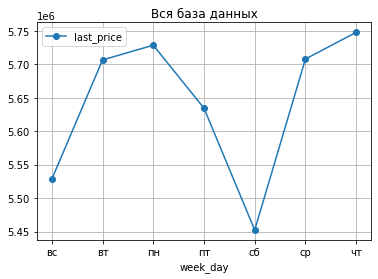

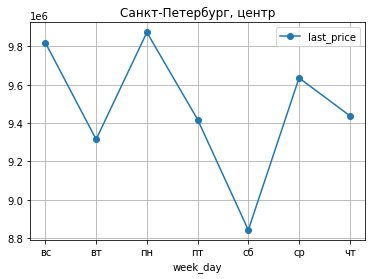

In [45]:
(
    df
    .pivot_table(index='week_day', values='last_price')
    .plot(title='Вся база данных', style='o-', grid=True) #график зависимости цены от дня недели размещения объявления (вся база)
)
(
    df.query('locality_name == "Санкт-Петербург" & cityCenters_km <= 8')
    .pivot_table(index='week_day', values='last_price')
    .plot(title='Санкт-Петербург, центр', style='o-', grid=True) #график зависимости цены от дня недели размещения объявления (Санкт-Петербург, центр)
)

Графики показывают, что в обоих случаях наименьшую стоимость имеют квартиры, выставленные на продажу в субботу. Однако, в остальном представленные графики существенно различаются. Наибольшее значение для центра Санкт-Петербурга - в понедельник, для всей базы - в четверг.

<AxesSubplot:title={'center':'Санкт-Петербург, центр'}, xlabel='month'>

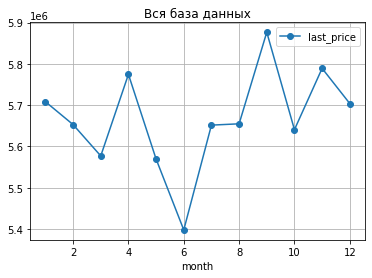

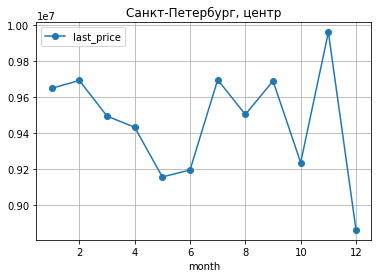

In [46]:
(
    df
    .pivot_table(index='month', values='last_price')
    .plot(title='Вся база данных', style='o-', grid=True) #график зависимости цены от дня месяца размещения объявления (вся база)
)
(
    df.query('locality_name == "Санкт-Петербург" & cityCenters_km <= 8')
    .pivot_table(index='month', values='last_price')
    .plot(title='Санкт-Петербург, центр', style='o-', grid=True) #график зависимости цены от дня месяца размещения объявления (Санкт-Петербург, центр)
)

Исходя из полученных данных, следует вывод о том, что месяц размещения объявления о продаже влияет на стоимость квартиры в центре Санкт-Петербурга иначе, чем для квартир по всей базе. Представленные графики существенно различаются, однако, все еще позволяют заметить некоторые закономерности: "яма" с апреля по июнь, резкий "подъем" с июня по июль, "подъем" с августа по сентябрь, резкое "падение" с сентября по октябрь, затем резкий "подъем" с октября по ноябрь и снова существенное падение с ноября по декабрь.  

<AxesSubplot:title={'center':'Санкт-Петербург, центр'}, xlabel='year'>

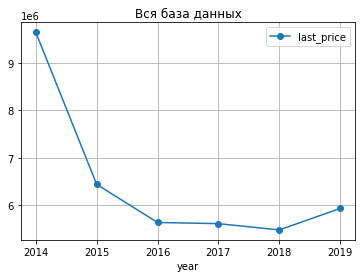

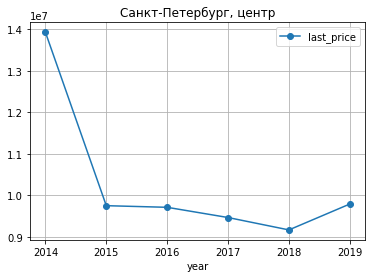

In [47]:
(
    df
    .pivot_table(index='year', values='last_price')
    .plot(title='Вся база данных', style='o-', grid=True) #график зависимости цены от года размещения объявления (вся база)
)
(
    df.query('locality_name == "Санкт-Петербург" & cityCenters_km <= 8')
    .pivot_table(index='year', values='last_price')
    .plot(title='Санкт-Петербург, центр', style='o-', grid=True) #график зависимости цены от года размещения объявления (Санкт-Петербург, центр)
)

В целом, данные графики зависимости цены от года размещения объявления схожи, за исключением того, что для центра Санкт-Петербурга отсутствует резкое снижение стоимости квартир в 2016 году. В остальном же, график по всей базе данных вполне корректно описывает изменения стоимости квартир в центре Санкт-Петербурга с 2014 по 2019 год.

### Вывод

В ходе данного этапа был проведен исследовательский анализ данных. Были изучены различные параметры квартир и прочие факторы, оказывающие влияние на их стоимость, построены соответствующие гистограммы и графики, наглядно демонстрирующие их взаимосвязь. Также, был определен сегмент квартир с наибольшей средней стоимостью - квартиры в центре Санкт-Петербурга. Их параметры также были проанализированы, полученные данные сопоставлены с данными по всей базе, сделаны соответствующие выводы. Более подробно они будут представлены на следующем, заключительном этапе проекта.

## Общий вывод

В ходе проведенного исследования были проанализированы данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Цель исследования — определение рыночной стоимости объектов недвижимости; изучение и анализ параметров квартир и прочих факторов, оказывающих влияние на их стоимость.

В полученных входных данных наблюдался ряд проблем, таких как: пропуски, аномальные значения, несоответствие типов данных содержанию столбцов. Все проблемы были устранены в процессе исследования, а данные — приведены в максимально пригодное для проведения анализа состояние.

В результате исследовательского анализа данных было установлено следующее:
- Подавляющее большинство квартир из объявлений по всей базе данных имеют площадь значительно меньше 100 кв. м ("пик" наблюдается в районе 40 кв. м). Есть также и небольшое количество квартир с весьма малой или, наоборот, крайне большой площадью, однако их количество - минимально.
- Цена большинства квартир составляет менее 10 млн. руб. Пик приходится на 4-5 млн. руб. Тем не менее, также наблюдается некоторое количество квартир со стоимостью более 10 млн. руб. Их количество постепенно снижается по мере увеличения цены в промежутке с 10 до 20 млн. руб. В промежутке с 20 до 30 млн. руб. их количество остается примерно одинаковым. 
- Большая часть квартир имеют 1-2 комнаты, причем количество таких квартир примерно одинаково (около 8000). Следом за ними - квартиры с 3 комнатами (менее 6000). Квартир с 4 комнатами и более - суммарно около 2000.
- В среднем, высота потолков находится в пределах 2,6 - 3,2 м.
- Среднее время продажи - 169 дней, медианное значение - 95 дней. "Быстрой" можно назвать продажу квартиры до 100 дней, "необычно долгой" - свыше 200 дней.
- Цена квартиры находятся в прямой зависимости от ее площади.
- Цена квартиры имеет прямую зависимость от числа комнат.
- Большинство квартир находятся в пределах 15 км от центра города. Стоимость квартир имеет обратную зависимость от расстояния до центра.
- Стоимость квартир, расположенных на первом этаже существенно ниже стоимости квартир, расположенных на последнем этаже. Наибольшую стоимость имеют квартиры, не располагающиеся на первом или последнем этажах.
- Большую цену имеют квартиры, объявления о продаже которых были размещены в четверг, понедельник, среду, вторник. Меньшую - в субботу, воскресенье и пятницу.
- Цены квартир зависят от месяца размещения объявления следующим образом: наибольшие цены - при размещении в сентябре, ноябре и апреле, наименьшие - при размещении в июне.
- Цены квартир неуклонно снижались после 2014 года, вплоть до 2018 года. В период с 2018 года по 2019 наблюдается заметный рост цен.
- Были определены 10 населённых пунктов с наибольшим числом объявлений. В их число входят: Санкт-Петербург (14817), посёлок Мурино (493), Всеволожск (391), посёлок Парголово (322), Гатчина (305), деревня Кудрово (283), посёлок Шушары (251), Выборг (233), Кудрово (168), деревня Новое Девяткино (141).
- Согласно полученным данным, среди указанных населённых пунктов наибольшая средняя цена квадратного метра - в Санкт-Петербурге (110650 руб.), наименьшая - в Выборге (58513 руб.). Самая высокая средняя стоимость жилья - также в Санкт-Петербурге (6.69 млн. руб.), самая низкая - в Колпино (2.95 млн. руб.).
- В ходе анализа данных о квартирах в Санкт-Петербурге было установлено, что цена квартир существенно падает после отметки в 8 км от центра, а значит "центром города" можно назвать всю территорию в радиусе 8 км.
- Подавляющее большинство квартир в центре Санкт-Петербурга имеют площадь до 100 кв. м. В целом, распределение по параметру площади несколько отличается от общей базы - "пик" все так же в районе 45 кв. м, однако заметно, что доля больших квартир (начиная с 50 кв. м и далее) существенно выше.
- В центре Санкт-Петербурга доля дорогих квартир выше, чем по всей базе данных. 
- В центре Санкт-Петербурга преобладают двухкомнатные и трехкомнатные квартиры, в отличие от данных по базе в целом, где преобладают однокомнатные и двухкомнатные квартиры.
- В центре Санкт-Петербурга доля квартир с высокими потолками больше, чем по всей базе данных: меньше квартир с высотой потолков до 2.5 м, больше - с высотой потолков более 3 м.
- У квартир в центре Санкт-Петербурга стоимость сильнее возрастает с ростом числа комнат (вплоть до 3): разница в стоимости между двухкомнатной и однокомнатной (или трехкомнатной и двухкомнатной) квартирами на данной территории в среднем больше, чем по всей базе. Однако, разница между четырехкомнатной и трехкомнатной, наоборот, меньше.
- Квартиры на первом этаже в обоих случаях имеют значительно более низкую стоимость, чем квартиры на других этажах. Квартиры на последем этаже также в обоих случаях дешевле квартир на других этажах, однако для центра Санкт-Петербурга последний этаж является менее существенным фактором снижения стоимости, чем для квартир по базе данных в целом.
- В центре Санкт-Петербурга стоимость квартир является относительно стабильной, с небольшим уменьшением при удалении от центра в пределах 8 км, в отличие от всей базы, где явно наблюдается серьезный спад по мере увеличения расстояния до центра города.
- В обоих случаях наименьшую стоимость имеют квартиры, выставленные на продажу в субботу. Наибольшее значение для центра Санкт-Петербурга - в понедельник, для всей базы - в четверг.
- Месяц размещения объявления о продаже влияет на стоимость квартиры в центре Санкт-Петербурга несколько иначе, чем для квартир по всей базе. Тем не менее, были выделены следующие общие закономерности: "яма" с апреля по июнь, резкий "подъем" с июня по июль, "подъем" с августа по сентябрь, резкое "падение" с сентября по октябрь, затем резкий "подъем" с октября по ноябрь и снова существенное "падение" с ноября по декабрь.
- В целом, зависимость цены от года размещения объявления и для центра Санкт-Петербурга и для всей базы примерно одинакова, за исключением того, что для центра Санкт-Петербурга отсутствует резкое снижение стоимости квартир в 2016 году. 

Таким образом, в ходе проведенного исследования все поставленные задачи были выполнены.